Hello, This is Dina Ibrahim.



In this notebook, I will build 2 lda models using 2 different technologies " sklearn and gemins "

**why scikit learn ? **
with grid search and vectorizers, you have a lot of options to find the optimal model and to present the results.

 **why gemins ? **
it contains the coherence measure the best measure to evaluate topic models because it considers the context and semantic associations between words.

# conntect with drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import liberaries

 ** The core package used in this notebook is scikit-learn (sklearn).
Regular expressions re, gensim and spacy are used to process texts. pyLDAvis and matplotlib for visualization and numpy and pandas for manipulating and viewing data in tabular format.**

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=79d03fd30a80ea3085da107fefd79ecb932e587f148bc3324097b8e5b03a88c5
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
# Run in terminal or command prompt
# python3 -m spacy download en

import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

#preprocessing
import string
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

#stop-words
nltk.download("stopwords")
stop_words=set(nltk.corpus.stopwords.words('english'))
nltk.download('punkt')

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


# read data

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Pubmed5k/Pubmed5k.xlsx')

# exploring the data

In [ ]:
data

,ArticleID,Title,Abstract
0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...
2,34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...
3,34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...
4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...
...,...,...,...
4994,34444567,Mind the Differences: How Diagnoses and Hospit...,Integrated care pathway (ICP) is a prevailing ...
4995,34444568,The Ethics of Dying: Deciphering Pandemic-Resu...,The objective of medicine is to provide humans...
4996,34444569,Research on Adolescents Regarding the Indirect...,This research involved the participation of 30...
4997,34444571,Pre-Intervention Effects of a Community-Based ...,This study explores the impact of the 'pre-int...


In [ ]:
data.Abstract[50]

"The aim: Is to investigate the level and dynamics of students' physical health in the process of sports and health tourism engagement.,Materials and methods: The research involved the students (men) of Sumy State University (n = 60). The research was conducted in 2018-2020. The comparative analysis of indicators of physical development, functional status and health of the students who were engaged in sports and health tourism (sports section of the Department of Physical Education, n = 30) in the process of their physical education, and the students who attended traditional physical education classes (main section, n = 30) was carried out. The level of the students' health was assessed according to the methods by H. L. Apanasenko and V. P. Voitenko.,Results: It was found that most indicators of physical development, functional status and state of health are significantly better at the end of the research in the students who were engaged in sports and health tourism during their educat

# preprocessing Functions

In [ ]:
#lowercase the articles 
data.Abstract = data.Abstract.apply(lambda t : t.lower())

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [ ]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the text data
data.Abstract = data.Abstract.apply(lambda x:expand_contractions(x))

In [ ]:
def remove_stopwords(article):
    "Return the articel after remvoing stopwords"
    article_tokens = word_tokenize(article) 
    filtered_article = [word for word in article_tokens if not word in stop_words] 
    return " ".join(filtered_article)


#removing stopwords
data.Abstract = data.Abstract.apply(remove_stopwords)

#removing Punctuations 
data.Abstract = data.Abstract.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#removing digits
data.Abstract = data.Abstract.apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
def remove_extra_marks(article):
    extra_keys = ["’","—","”","“"]
    article_tokens = word_tokenize(article) 
    filtered_article = [word for word in article_tokens if not word in extra_keys] 
    return " ".join(filtered_article)
    
data.Abstract = data.Abstract.apply(remove_extra_marks)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def lemmatize(text):
    """Return text after performing the lemmztiztion"""
    doc = nlp(text)
    tokens = [token for token in doc]
    return  " ".join([token.lemma_ for token in doc])

#lemmatize the articles
data.Abstract = data.Abstract.apply(lemmatize)

In [ ]:
data.Abstract[50]

'aim investigate level dynamic student physical health process sport health tourism engagement material methods research involve student man sumy state university n research conduct comparative analysis indicator physical development functional status health student engage sport health tourism sports section department physical education n process physical education student attend traditional physical education class main section n carry level student health assess accord method h l apanasenko v p voitenko result find indicator physical development functional status state health significantly well end research student engage sport health tourism education student engage traditional physical education class large increase indicator body weight circumferential size chest waist heart rate vital strength indice robinson index duration heart rate recovery standard exercise duration breathholde inspiration expiration level physical health conclusion high level physical development functional

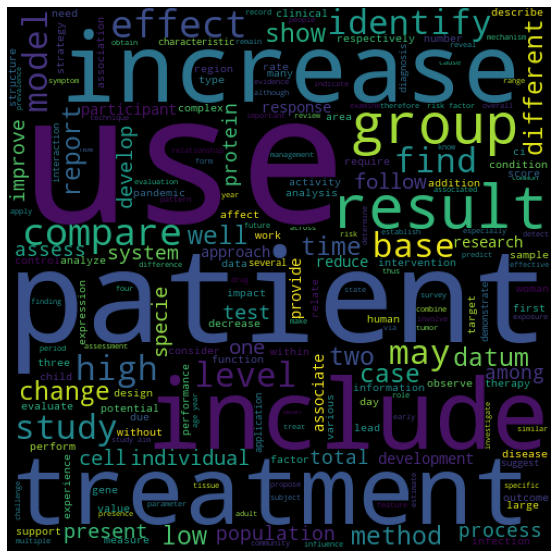

In [ ]:
import wordcloud
from wordcloud import WordCloud

#combine all the articles
article_data = ""
for article in data.Abstract:
    article_data = article_data+" "+article

#ploting the word cloud
plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width = 500, height = 500,  random_state=10).generate(article_data)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#sklearn

##Create the Document-Word matrix

In [ ]:
vectorizer = CountVectorizer(analyzer='word',       
                             max_df=0.95,                # maximum reqd occurences of a word
                             min_df=2                    # minimum reqd occurences of a word 
                            )

data_vectorized = vectorizer.fit_transform(data.Abstract)

In [ ]:
import random
for i in range(10):
    random_word_id = random.randint(0,len(data))
    print(vectorizer.get_feature_names()[random_word_id])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


acl
alanine
cinahl
durability
abruptly
change
doxycycline
bait
corona
cbz


In [ ]:
 #Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.4854049212920987 %


##Build LDA model with sklearn

In [ ]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=10,               # Number of topics
                                      max_iter=1,               # Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          # Random state
                                      batch_size=128,            # n docs in each learning iter
                                      evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

print(lda_model)  # Model attributes

LatentDirichletAllocation(learning_method='online', max_iter=1, n_jobs=-1,
                          random_state=100)


In [ ]:
single_topic = lda_model.components_[0]
single_topic.argsort()

array([ 8450, 16202,  8622, ...,  7659,  2075,  6474])

In [ ]:
for index in single_topic.argsort()[-10:]:
    print(vectorizer.get_feature_names()[index])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


practice
public
mental
service
community
research
social
intervention
care
health


In [ ]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['pandemic', 'experience', 'need', 'support', 'student', 'practice', 'public', 'mental', 'service', 'community', 'research', 'social', 'intervention', 'care', 'health']


THE TOP 15 WORDS FOR TOPIC #1
['show', 'structure', 'network', 'study', 'different', 'provide', 'propose', 'approach', 'application', 'result', 'system', 'process', 'model', 'method', 'use']


THE TOP 15 WORDS FOR TOPIC #2
['target', 'new', 'show', 'sequence', 'also', 'species', 'role', 'human', 'mechanism', 'expression', 'protein', 'specie', 'pathway', 'gene', 'cell']


THE TOP 15 WORDS FOR TOPIC #3
['rate', 'year', 'group', 'treatment', 'include', 'case', 'use', 'outcome', 'clinical', 'disease', 'cancer', 'ci', 'risk', 'study', 'patient']


THE TOP 15 WORDS FOR TOPIC #4
['implant', 'device', 'lipid', 'temperature', 'content', 'use', 'effect', 'chemical', 'soil', 'surface', 'concentration', 'specie', 'acid', 'increase', 'water']


THE TOP 15 WORDS FOR TOPIC #5
['td', 'polyp', 'gen', 'schizophrenia', 'brain', 'movemen

**there are common words betweent the topics such as: high , use ,etc.. **

In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
7      32.420952   8.115230       1        1  26.079866
3       0.648955  71.707100       2        1  20.419492
1      71.019684   9.971006       3        1  13.490103
0       3.785981  33.185135       4        1  11.072657
2     -42.666500  -9.222070       5        1  10.589779
4      -3.621689 -43.526516       6        1   5.882304
9      -3.632402  -4.171708       7        1   4.968241
6     -36.584400  35.804413       8        1   4.708807
5      44.391380  50.615383       9        1   1.431653
8      40.235809 -31.591665      10        1   1.357098, topic_info=                  Term         Freq        Total Category  logprob  loglift
10944          patient  5025.000000  5025.000000  Default  30.0000  30.0000
6474            health  2682.000000  2682.000000  Default  29.0000  29.0000
6292             group  2319.000000  2319.000000  Default  28.0000  28.0000
2208              cell  1999.000000  1999.000000  Default  27.0000  27.0000
6011              gene  1038.000000  1038.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
11209  pharmacological    22.823096    60.971046  Topic10  -5.8749   3.3172
6088               get    21.913411    52.097383  Topic10  -5.9156   3.4338
16157            virus    24.963757   323.607012  Topic10  -5.7852   1.7377
12501          receive    22.939621   518.850996  Topic10  -5.8698   1.1811
184           activity    23.346541   977.141162  Topic10  -5.8522   0.5656

[761 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
28         8  0.961349   ablation
60         3  0.008565  abundance
60         5  0.985021  abundance
85         1  0.015877     access
85         2  0.027785     access
...      ...       ...        ...
16554     10  0.006427      yield
16593      1  0.032434       zinc
16593      5  0.162168       zinc
16593     10  0.778404       zinc
16615     10  0.869399        µgg

[2719 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 4, 2, 1, 3, 5, 10, 7, 6, 9])

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

Alright, if you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.
We have successfully built a good looking topic model.

Given our prior knowledge of the number of natural topics in the document, finding the best model was fairly straightforward.

Upnext, we will improve upon this model by using Mallet’s version of LDA algorithm and then we will focus on how to arrive at the optimal number of topics given any large corpus of text.

##  How good a given topic model is? 

In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))

# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -4820367.138454224
Perplexity:  3139.1245288345294
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 1,
 'mean_change_tol': 0.001,
 'n_components': 10,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}



**A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.**


##  Hyperparameter Tuning

In [ ]:
# Define Search Param
search_params = {'n_components': [5,10, 15, 20, 25,30]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'n_components': [5, 10, 15, 20, 25, 30]})

## the best topic model

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'n_components': 5}
Best Log Likelihood Score:  -1047058.1551732253
Model Perplexity:  2832.6655048164625


In [ ]:
lda_model=best_lda_model

In [ ]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = ["Topic" + str(i) for i in range(lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > 0 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > 0 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.000000,0.130000,0.000000,0.000000,0.860000,4
Doc1,0.040000,0.480000,0.000000,0.480000,0.000000,1
Doc2,0.000000,0.660000,0.250000,0.080000,0.000000,1
Doc3,0.000000,0.020000,0.000000,0.980000,0.000000,3
Doc4,0.000000,0.960000,0.000000,0.000000,0.040000,1
Doc5,0.000000,0.670000,0.000000,0.330000,0.000000,1
Doc6,0.320000,0.000000,0.130000,0.520000,0.020000,3
Doc7,0.370000,0.180000,0.000000,0.210000,0.250000,0
Doc8,0.000000,0.000000,0.130000,0.870000,0.000000,3
Doc9,0.370000,0.000000,0.000000,0.340000,0.290000,0


In [ ]:
lda_output
results=[]
for i in range(len(lda_output)):
    #sort the value and get highest 3 topics
    results.append(lda_output[i].argsort()[-3:][::-1]) 

In [ ]:
#topics distribution across documents
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,1,1319
1,2,1199
2,3,1142
3,0,901
4,4,438


In [ ]:
data["Topic"]=results

In [ ]:
data

,ArticleID,Title,Abstract,Topic
0,34153941,Stable Coordination Variability in Overground ...,coordination variability cv commonly analyze u...,"[4, 1, 3]"
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,clinical scenario dynamic knee valgus dkv mech...,"[1, 3, 0]"
2,34153964,Current and Future Projections of Amyotrophic ...,various methodology report assess realworld ep...,"[1, 2, 3]"
3,34153968,Disparities between Asian and Non-Asian Thromb...,outcomes acute ischemic stroke ais vary accord...,"[3, 1, 0]"
4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,hear loss child result developmental deficit e...,"[1, 4, 3]"
...,...,...,...,...
4994,34444567,Mind the Differences: How Diagnoses and Hospit...,integrated care pathway icp prevail concept he...,"[1, 0, 3]"
4995,34444568,The Ethics of Dying: Deciphering Pandemic-Resu...,objective medicine provide human best possible...,"[1, 3, 0]"
4996,34444569,Research on Adolescents Regarding the Indirect...,research involve participation chinese student...,"[1, 4, 0]"
4997,34444571,Pre-Intervention Effects of a Community-Based ...,study explore impact preintervention effect co...,"[1, 3, 2]"


In [ ]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')
panel

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distan

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  28.376134
3       51.163364 -159.968018       2        1  23.077859
2      -73.144554   21.523815       3        1  20.317918
0      -66.410133 -110.606438       4        1  16.559159
4       54.417324   12.443444       5        1  11.668930, topic_info=             Term         Freq        Total Category  logprob  loglift
10944     patient  5128.000000  5128.000000  Default  30.0000  30.0000
2208         cell  1988.000000  1988.000000  Default  29.0000  29.0000
6474       health  2424.000000  2424.000000  Default  28.0000  28.0000
14000      specie  1083.000000  1083.000000  Default  27.0000  27.0000
5261   expression   781.000000   781.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
9336        model   190.388111  1819.508724   Topic5  -5.9052  -0.1090
656      analysis   189.758429  2015.335062   Topic5  -5.9085  -0.2145
8521          low   180.846651  1376.858300   Topic5  -5.9566   0.1183
3994    different   172.660278  1159.594609   Topic5  -6.0029   0.2437
10944     patient   182.290377  5128.257646   Topic5  -5.9486  -1.1887

[455 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
85         1  0.911135  access
85         2  0.009361  access
85         3  0.024963  access
85         4  0.009361  access
85         5  0.049925  access
...      ...       ...     ...
16539      2  0.484457    year
16539      3  0.027780    year
16539      4  0.008131    year
16539      5  0.039299    year
16596      3  0.982109      zn

[1060 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1, 5])

#gensim

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint

## Create id2word

In [ ]:
#tokenize articles
tokeize_article = data.Abstract.apply(lambda x : x.split())
id2word = corpora.Dictionary(tokeize_article)

# Create Corpus
texts = tokeize_article

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


#printing 50 words from the text corpus
corpus_example = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]
corpus_example[0][:50]

[('achieve', 1),
 ('analyze', 1),
 ('approach', 1),
 ('average', 1),
 ('aware', 1),
 ('calculated', 1),
 ('calculation', 1),
 ('capture', 1),
 ('code', 1),
 ('coding', 1),
 ('commonly', 1),
 ('compare', 1),
 ('consequence', 1),
 ('coordination', 1),
 ('couple', 1),
 ('coupling', 1),
 ('cv', 7),
 ('determine', 1),
 ('develop', 1),
 ('differ', 1),
 ('difference', 1),
 ('dynamical', 1),
 ('few', 1),
 ('finding', 1),
 ('fix', 2),
 ('future', 1),
 ('guideline', 1),
 ('healthy', 1),
 ('human', 1),
 ('individual', 1),
 ('inform', 2),
 ('insufficient', 1),
 ('joint', 1),
 ('kinematic', 1),
 ('lead', 1),
 ('limb', 2),
 ('locomotion', 3),
 ('low', 2),
 ('mean', 3),
 ('minimum', 2),
 ('mode', 2),
 ('modify', 1),
 ('notable', 1),
 ('number', 4),
 ('output', 1),
 ('overall', 1),
 ('overground', 2),
 ('oversight', 1),
 ('perform', 1),
 ('phase', 2)]

## build model

In [ ]:
# build LDA model for 5 topic
lda_model_gensim = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           per_word_topics=True,
                                           eta = 0.6)

In [ ]:
# Print the Keyword in the 5 topics
pprint(lda_model_gensim.print_topics())
doc_lda = lda_model_gensim [corpus]

[(0,
  '0.025*"patient" + 0.009*"group" + 0.008*"study" + 0.007*"treatment" + '
  '0.007*"p" + 0.006*"cancer" + 0.006*"clinical" + 0.005*"year" + 0.005*"use" '
  '+ 0.005*"case"'),
 (1,
  '0.010*"cell" + 0.006*"protein" + 0.006*"study" + 0.005*"use" + 0.005*"gene" '
  '+ 0.005*"effect" + 0.004*"expression" + 0.004*"show" + 0.004*"increase" + '
  '0.004*"result"'),
 (2,
  '0.010*"use" + 0.007*"model" + 0.006*"method" + 0.005*"result" + '
  '0.005*"water" + 0.004*"specie" + 0.004*"two" + 0.004*"base" + 0.003*"show" '
  '+ 0.003*"area"'),
 (3,
  '0.007*"sp" + 0.005*"nov" + 0.005*"specie" + 0.003*"genus" + 0.003*"species" '
  '+ 0.003*"s" + 0.003*"et" + 0.003*"t" + 0.002*"ctc" + 0.002*"a"'),
 (4,
  '0.014*"study" + 0.010*"health" + 0.010*"use" + 0.004*"include" + '
  '0.004*"datum" + 0.004*"care" + 0.004*"among" + 0.004*"research" + '
  '0.004*"risk" + 0.004*"review"')]




Topic 0 is a represented as _'0.025*"patient" + 0.009*"group" + 0.008*"study" + 0.007*"treatment" + '
  '0.007*"p" + 0.006*"cancer" + 0.006*"clinical" + 0.005*"year" + 0.005*"use" '
  '+ 0.005*"case".

It means the top 10 keywords that contribute to this topic are: patient, group, study.. and so on and the weight of patient on topic 0 is 0.025.

The weights reflect how important a keyword is to that topic and guessing what this topic could be?

In [ ]:
# Visualize the topics
import pyLDAvis.gensim_models as gensimvis  
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_gensim , corpus, id2word,mds='tsne')
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by defau

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  35.343122
1       51.163364 -159.968018       2        1  23.666153
0      -73.144554   21.523815       3        1  23.567626
2      -66.410133 -110.606438       4        1  14.797759
3       54.417324   12.443444       5        1   2.625341, topic_info=          Term         Freq        Total Category  logprob  loglift
196    patient  4569.000000  4569.000000  Default  30.0000  30.0000
178     health  2337.000000  2337.000000  Default  29.0000  29.0000
460       cell  1591.000000  1591.000000  Default  28.0000  28.0000
782    protein   953.000000   953.000000  Default  27.0000  27.0000
831       gene   840.000000   840.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1512         l    15.327549    79.654661   Topic5  -7.0098   1.9919
845       male    18.436836   385.251919   Topic5  -6.8251   0.6004
42041      gbv    13.090364    64.777504   Topic5  -7.1675   2.0409
367        new    14.500163   718.756859   Topic5  -7.0652  -0.2634
7010     south    11.403873    90.071702   Topic5  -7.3055   1.5733

[374 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
792       1  0.016770     a
792       2  0.318624     a
792       3  0.016770     a
792       4  0.016770     a
792       5  0.637248     a
...     ...       ...   ...
221       4  0.002780  year
1118      1  0.023197     ±
1118      2  0.007732     ±
1118      3  0.949132     ±
1118      4  0.021264     ±

[1198 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 3, 4])

## How good a given topic model is? 

Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is.

In [ ]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model_gensim .log_perplexity(corpus))  # a measure of how good the model is. lower the better.
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_gensim , texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.59268530561494

Coherence Score:  0.41539977826250735


**A model with higher Coherence Score and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.**

## Hyperparameter Tuning

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           per_word_topics=True,
                                           eta = 0.6)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=5, limit=30, step=5)

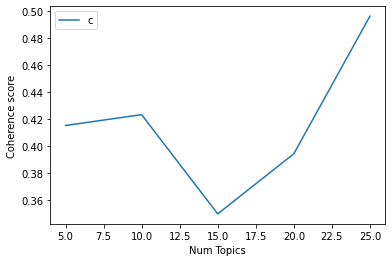

In [ ]:
# Show graph
limit=30; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.4154
Num Topics = 10  has Coherence Value of 0.4234
Num Topics = 15  has Coherence Value of 0.3498
Num Topics = 20  has Coherence Value of 0.3944
Num Topics = 25  has Coherence Value of 0.4964


In [ ]:
# Select the model and print the topics
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(24,
  '0.011*"water" + 0.005*"temperature" + 0.005*"soil" + 0.005*"plant" + '
  '0.005*"pollution" + 0.004*"food" + 0.004*"environmental" + 0.003*"carbon" + '
  '0.003*"°" + 0.003*"ecosystem"'),
 (17,
  '0.002*"bettor" + 0.001*"gamble" + 0.001*"esport" + 0.001*"bet" + '
  '0.000*"gambler" + 0.000*"gambling" + 0.000*"gamblingrelate" + '
  '0.000*"nonenglish" + 0.000*"earner" + 0.000*"videogame"'),
 (7,
  '0.013*"study" + 0.011*"use" + 0.009*"health" + 0.004*"result" + '
  '0.004*"model" + 0.004*"datum" + 0.004*"include" + 0.003*"effect" + '
  '0.003*"analysis" + 0.003*"research"'),
 (19,
  '0.002*"rs" + 0.001*"odx" + 0.001*"sibe" + 0.000*"intermediaterisk" + '
  '0.000*"tvia" + 0.000*"coil" + 0.000*"mwd" + 0.000*"theater" + '
  '0.000*"africom" + 0.000*"indopacom"'),
 (4,
  '0.016*"specie" + 0.007*"sp" + 0.005*"species" + 0.005*"nov" + 0.004*"new" + '
  '0.003*"genus" + 0.003*"describe" + 0.003*"s" + 0.003*"n" + 0.002*"t"'),
 (2,
  '0.001*"bicep" + 0.000*"femoris" + 0.000*"isokinetic"

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(model_list[4], corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.349552  0.008221       1        1  40.490293
5     -0.235035  0.131705       2        1  26.421431
13    -0.250130 -0.138524       3        1  23.301419
24     0.032368  0.087230       4        1   3.785126
4      0.043372  0.000548       5        1   3.150355
10     0.048078 -0.030749       6        1   1.603799
11     0.037733 -0.003249       7        1   0.115158
23     0.037789 -0.003185       8        1   0.113830
19     0.037455 -0.003846       9        1   0.105795
14     0.039175 -0.003963      10        1   0.097539
6      0.037424 -0.003602      11        1   0.092628
15     0.038028 -0.002873      12        1   0.084763
8      0.038128 -0.003133      13        1   0.081091
2      0.037150 -0.003389      14        1   0.072220
16     0.037576 -0.003088      15        1   0.064350
20     0.037230 -0.002782      16        1   0.058736
17     0.037600 -0.003105      17        1   0.046532
22     0.036962 -0.002936      18        1   0.046484
9      0.037080 -0.002818      19        1   0.045309
0      0.036925 -0.002792      20        1   0.043927
1      0.036865 -0.002768      21        1   0.039384
18     0.036974 -0.002716      22        1   0.037949
3      0.036933 -0.002779      23        1   0.034900
21     0.037015 -0.002652      24        1   0.033643
12     0.036857 -0.002755      25        1   0.033337, topic_info=                 Term         Freq        Total Category  logprob  loglift
196           patient  4546.000000  4546.000000  Default  30.0000  30.0000
460              cell  1603.000000  1603.000000  Default  29.0000  29.0000
178            health  2341.000000  2341.000000  Default  28.0000  28.0000
2243           specie   468.000000   468.000000  Default  27.0000  27.0000
340             child   317.000000   317.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
39405  myasthenialike     0.005492     3.824027  Topic25 -10.5775   1.4606
39406      myasthenic     0.005492     3.824027  Topic25 -10.5775   1.4606
39407  myastheniclike     0.005492     3.824027  Topic25 -10.5775   1.4606
39393       decrement     0.005918     9.988946  Topic25 -10.5029   0.5750
23973       hemolytic     0.005538     6.167864  Topic25 -10.5692   0.9909

[1114 rows x 6 columns], token_table=       Topic      Freq               Term
term                                     
792        1  0.046696                  a
792        2  0.217913                  a
792        3  0.062261                  a
792        5  0.653738                  a
36557      1  0.329221  abdominaladhesion
...      ...       ...                ...
9899       3  0.171500               µgkg
9899       4  0.137200               µgkg
9899       6  0.034300               µgkg
37882      2  0.470581         ßcarboline
37882      3  0.235290         ßcarboline

[3167 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 14, 25, 5, 11, 12, 24, 20, 15, 7, 16, 9, 3, 17, 21, 18, 23, 10, 1, 2, 19, 4, 22, 13])

**How you can further improve the results .. How to further clean & optimize the data-sets to improve the performance of the LDA algorithm
**

1. clean & optimize the data-sets .. remove the common and non-meaningful words
2. read some of the documents to understand the data more 
3. work more on the hyberparameter tuning 